In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Ball_by_Ball_2008_2022.csv"
df = pd.read_csv(path)

path = "/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Matches_2008_2022.csv"
df2 = pd.read_csv(path)

df


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [2]:
#Delhi Daredevils has been rebranded to Delhi Capitals, therefore both Delhi Daredevils and Delhi Capitals are saved as Delhi
#Rising Pune Supergiants had a typo in some of the columns and it was written as Rising Pune Supergiant. That has also been fixed

df2 = df2.replace({"Team1": {"Delhi Daredevils": "Delhi", "Delhi Capitals": "Delhi", "Rising Pune Supergiant": "Rising Pune Supergiants","Royal Challengers Bangalore":"Royal Challengers Bengaluru"},
                            "Team2": {"Delhi Daredevils": "Delhi", "Delhi Capitals": "Delhi", "Rising Pune Supergiant": "Rising Pune Supergiants","Royal Challengers Bangalore":"Royal Challengers Bengaluru"},
                            "WinningTeam": {"Delhi Daredevils": "Delhi", "Delhi Capitals": "Delhi", "Rising Pune Supergiant": "Rising Pune Supergiants","Royal Challengers Bangalore":"Royal Challengers Bengaluru"}})

df = df.replace({"BattingTeam": {"Delhi Daredevils": "Delhi", "Delhi Capitals": "Delhi", "Rising Pune Supergiant": "Rising Pune Supergiants"}})


In [4]:
#Dropping all rain affected matches or abandoned matches

counter = 0
indices = []
for i in df2['ID']:
    row = df2.loc[df2['ID'] == i].iloc[0]
    if pd.notna(row['method']) or row['WonBy'] == 'NoResults':
        counter += 1
        indices.append(i)


for i in indices:
    df = df[df['ID'] != i]
    df2 = df2[df2['ID'] != i]


In [5]:
df_temp = df2[df2['Date'] < '2020-09-19']

All features have been standardised such that the good statistic is positive and bad statistic is negative

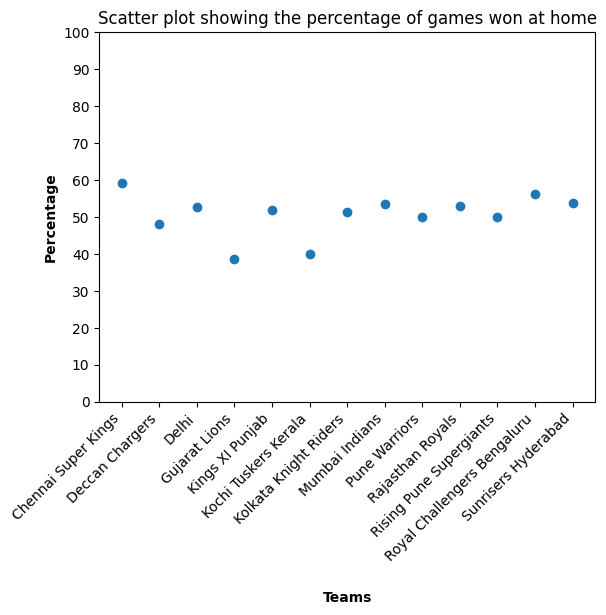


Average percentage of matches won at home: 50.58
Since the average percentages of matches won at home is 50.58, we can safely conclude that there is no home ground advantage in the IPL
Since the maximum percentage of matches won at home is 59.14, therefore no team has a significant home advantage


In [10]:
#Code to calculate the percentage of matches won by a team at home divided by the total matches won
#Only regular season matches have been taken into account with the help of try and except

dicti_team_home = {}
for i in df_temp['ID']:
    try:
        row = df_temp.loc[df_temp['ID'] == i].iloc[0]
        x = row['ID']
        j = int(x)
        if row['Team1'] == row['WinningTeam']:
            team_name = row['Team1']
            if team_name not in dicti_team_home:
                dicti_team_home[team_name] = 1
            else:
                dicti_team_home[team_name] += 1
        
    except ValueError:
        continue


dicti_team_away = {}

for i in df_temp['ID']:
    try:
        row = df_temp.loc[df_temp['ID'] == i].iloc[0]
        x = row['MatchNumber']
        j = int(x)
        if row['Team2'] == row['WinningTeam']:
            team_name = row['Team2']
            if team_name not in dicti_team_away:
                dicti_team_away[team_name] = 1
            else:
                dicti_team_away[team_name] += 1
        
    except ValueError:
        continue


    
dicti_team_home_sorted = {key: dicti_team_home[key] for key in sorted(dicti_team_home.keys())}

dicti_team_away_sorted = {key: dicti_team_away[key] for key in sorted(dicti_team_away.keys())}

'''
print(dicti_team_home_sorted)
print(dicti_team_away_sorted)
'''

dicti_team_home_percentage = {}

# Calculate and store the percentage
for team in dicti_team_home_sorted:
    home_wins = dicti_team_home_sorted[team]
    away_wins = dicti_team_away_sorted.get(team, 0)
    total_wins = home_wins + away_wins
    if total_wins > 0:
        home_percentage = (home_wins / total_wins) * 100
        dicti_team_home_percentage[team] = home_percentage
'''
print("\nPercentage of matches won at home by each team:")
print(dicti_team_home_percentage)
'''

total_percentage = sum(dicti_team_home_percentage.values())
average_percentage = total_percentage / len(dicti_team_home_percentage)



x = np.arange(1,len(dicti_team_home_percentage.values())+1)
y = dicti_team_home_percentage.values()
plt.scatter(x,y)
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.xticks(x, list(dicti_team_home_percentage.keys()), rotation=45, ha='right')
plt.xlabel("Teams", labelpad = 20, weight = 'bold')
plt.ylabel("Percentage", weight = 'bold')
plt.title("Scatter plot showing the percentage of games won at home")
plt.yticks(np.arange(0,101,10))
plt.show()

print(f"\nAverage percentage of matches won at home: {round(average_percentage,2)}")
print(f"Since the average percentages of matches won at home is {round(average_percentage,2)}, we can safely conclude that there is no home ground advantage in the IPL")
print(f"Since the maximum percentage of matches won at home is {round(max(dicti_team_home_percentage.values()),2)}, therefore no team has a significant home advantage")

In [11]:
ball_by_ball_df = df
matches_df = df2

bowlers = ball_by_ball_df['bowler'].unique()
bowling_averages_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    
    total_balls_bowled = len(bowler_bowling)
    
    total_runs_conceded = bowler_bowling['total_run'].sum()
    
    # Count the number of wickets taken by the bowler (excluding run outs, wickets taken on no balls, and wickets taken on free hits)
    wickets_mask = (bowler_bowling['player_out'].notna()) & (bowler_bowling['kind'] != 'run out') & (bowler_bowling['extra_type'] != 'noballs')
    freehit_mask = bowler_bowling['extra_type'].shift(1) == 'noballs'
    total_wickets = np.sum(wickets_mask & ~freehit_mask)
    
    #threshold is set at 200 minimum number of balls bowled
    if total_balls_bowled >= 200:
        # for bowling average
        if total_wickets > 0:
            bowling_average = total_runs_conceded / total_wickets
            bowling_averages_dict[bowler] = bowling_average

sorted_bowling_averages = sorted(bowling_averages_dict.items(), key=lambda x: x[1])
print("Bowling averages of bowlers who have bowled a minimum of 200 balls (in ascending order, excluding run outs, wickets taken on no balls, and wickets taken on free hits):")


sorted_bowling_averages = dict(sorted_bowling_averages)
bowling_averages_df = pd.DataFrame.from_dict(sorted_bowling_averages , orient='index', columns=['Average'])
bowling_averages_df['Average'] = (bowling_averages_df['Average'] - bowling_averages_df['Average'].mean()) * -1 / bowling_averages_df['Average'].std()
bowling_averages_df

Bowling averages of bowlers who have bowled a minimum of 200 balls (in ascending order, excluding run outs, wickets taken on no balls, and wickets taken on free hits):


,Average
Sohail Tanvir,1.993661
Mohsin Khan,1.793773
CRD Fernando,1.423610
BJ Hodge,1.399223
L Ngidi,1.382152
...,...
DJ Hussey,-2.994283
A Mithun,-3.566185
Parvez Rasool,-3.784581
TM Dilshan,-4.339085


In [12]:

matches_df = df2
batsmen = ball_by_ball_df['batter'].unique()
averages_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    
    total_balls_faced = len(batsman_batting)
    
    # threshold at minimum 200 balls faced
    if total_balls_faced >= 200:
        match_stats = batsman_batting.groupby('ID').agg({'batsman_run': 'sum'}).reset_index()

        total_runs = match_stats['batsman_run'].sum()
        total_innings = len(match_stats)
        
        #number of dismissals for the batsman
        total_dismissals = np.sum(ball_by_ball_df['player_out'] == batsman)
        if total_dismissals > 0:
            overall_average = total_runs / total_dismissals
            averages_dict[batsman] = overall_average


batsmen_averages_df = pd.DataFrame.from_dict(averages_dict, orient='index', columns=['Average'])
batsmen_averages_df['Standardized Average'] = (batsmen_averages_df['Average'] - batsmen_averages_df['Average'].mean()) / batsmen_averages_df['Average'].std()

batsmen_averages_df = batsmen_averages_df.sort_values(by='Average', ascending=False)
print("Batting Averages and Standardized Averages for batsmen who have faced at least 200 balls:")
batsmen_averages_df

Batting Averages and Standardized Averages for batsmen who have faced at least 200 balls:


,Average,Standardized Average
HM Amla,47.333333,2.831411
KL Rahul,46.573171,2.733667
DA Warner,41.101449,2.030102
AK Markram,40.538462,1.957711
AB de Villiers,40.484127,1.950725
...,...,...
Rashid Khan,11.178571,-1.817447
R Vinay Kumar,11.071429,-1.831224
SK Warne,9.900000,-1.981848
P Kumar,8.947368,-2.104340


In [13]:

ball_by_ball_df = df
matches_df = df2


bowlers = ball_by_ball_df['bowler'].unique()
balls_per_wicket_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]

    total_balls_bowled = len(bowler_bowling)

    if total_balls_bowled >= 200:
        wickets_mask = (bowler_bowling['player_out'].notna()) & (bowler_bowling['kind'] != 'run out') & (bowler_bowling['extra_type'] != 'noballs')

        freehit_mask = bowler_bowling['extra_type'].shift(1) == 'noballs'

        total_wickets = wickets_mask[~freehit_mask].sum()
        if total_wickets > 0:
            balls_per_wicket = total_balls_bowled / total_wickets
            balls_per_wicket_dict[bowler] = balls_per_wicket

balls_per_wicket_df = pd.DataFrame.from_dict(balls_per_wicket_dict, orient='index', columns=['Balls per Wicket'])

balls_per_wicket_df = balls_per_wicket_df.sort_values(by='Balls per Wicket')

print("Balls per Wicket (minimum 200 balls bowled):")


balls_per_wicket_df['Standardised'] = (balls_per_wicket_df['Balls per Wicket'] - balls_per_wicket_df['Balls per Wicket'].mean()) * -1 / balls_per_wicket_df['Balls per Wicket'].std()
balls_per_wicket_df

Balls per Wicket (minimum 200 balls bowled):


,Balls per Wicket,Standardised
Sohail Tanvir,12.045455,1.756878
L Ngidi,13.680000,1.514027
BJ Hodge,14.000000,1.466483
A Zampa,14.500000,1.392196
CRD Fernando,14.647059,1.370346
...,...,...
A Mithun,42.571429,-2.778503
J Yadav,46.000000,-3.287902
Parvez Rasool,50.000000,-3.882200
TM Dilshan,55.000000,-4.625072


In [14]:
ball_by_ball_df = df
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()
strike_rates_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    
    # Count the total number of balls faced by the batsman (excluding wide and no balls)
    balls_faced = len(batsman_batting[(batsman_batting['extras_run'] == 0) | ((batsman_batting['extra_type'] != 'wides') & (batsman_batting['extra_type'] != 'noballs'))])
 
    if balls_faced >= 200:
        runs_scored = batsman_batting[batsman_batting['extra_type'] != 'legbyes']['batsman_run'].sum()
        strike_rate = (runs_scored * 100) / balls_faced
        strike_rates_dict[batsman] = strike_rate

strike_rates_df = pd.DataFrame.from_dict(strike_rates_dict, orient='index', columns=['Strike Rate'])
strike_rates_df = strike_rates_df.sort_values(by='Strike Rate', ascending=False)
print("Strike Rates (minimum 200 balls faced, excluding leg byes, wide, and no balls):")

strike_rates_df['Standardised'] = (strike_rates_df['Strike Rate'] - strike_rates_df['Strike Rate'].mean())/ strike_rates_df['Strike Rate'].std()
strike_rates_df

Strike Rates (minimum 200 balls faced, excluding leg byes, wide, and no balls):


,Strike Rate,Standardised
AD Russell,179.785331,3.660059
LS Livingstone,168.125000,2.836146
SP Narine,163.840000,2.533369
V Sehwag,155.418139,1.938284
GJ Maxwell,154.956170,1.905642
...,...,...
CA Pujara,100.000000,-1.977537
A Mishra,93.540052,-2.433994
SK Warne,92.957746,-2.475140
B Kumar,91.286307,-2.593243


In [15]:
ball_by_ball_df = df
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()

avg_balls_faced_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]

    innings_played = batsman_batting['ID'].nunique()

    balls_faced = len(batsman_batting[(batsman_batting['extras_run'] == 0) | ((batsman_batting['extra_type'] != 'wides') & (batsman_batting['extra_type'] != 'noballs'))])

    if balls_faced >= 200:
        avg_balls_faced = balls_faced / innings_played
        avg_balls_faced_dict[batsman] = avg_balls_faced

avg_balls_faced_df = pd.DataFrame.from_dict(avg_balls_faced_dict, orient='index', columns=['Average Balls Faced'])

avg_balls_faced_df = avg_balls_faced_df.sort_values(by='Average Balls Faced', ascending=False)

print("Average Balls Faced (minimum 200 balls faced, excluding wide and no balls):")

avg_balls_faced_df['Standardised'] = (avg_balls_faced_df['Average Balls Faced'] - avg_balls_faced_df['Average Balls Faced'].mean())/ avg_balls_faced_df['Average Balls Faced'].std()
avg_balls_faced_df

Average Balls Faced (minimum 200 balls faced, excluding wide and no balls):


,Average Balls Faced,Standardised
KL Rahul,29.354167,2.501679
LMP Simmons,29.241379,2.480248
MEK Hussey,28.107143,2.264735
SE Marsh,27.367647,2.124225
HM Amla,26.666667,1.991034
...,...,...
R Vinay Kumar,6.523810,-1.836258
R Bhatia,6.042553,-1.927700
P Kumar,5.473684,-2.035789
Rashid Khan,4.926829,-2.139696


In [25]:
ball_by_ball_df = df
matches_df = df2
batsmen = ball_by_ball_df['batter'].unique()

centuries_dict = {}
for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    match_runs = batsman_batting.groupby('ID')['batsman_run'].sum()
    centuries = len(match_runs[match_runs >= 100])
    
    if centuries > 0:
        centuries_dict[batsman] = centuries

centuries_df = pd.DataFrame.from_dict(centuries_dict, orient='index', columns=['centuries'])
centuries_df = centuries_df.sort_values(by='centuries', ascending=False)

print("Number of Centuries for each batsman:")
centuries_df['Standardised'] = (centuries_df ['centuries'] - centuries_df['centuries'].mean())/ centuries_df['centuries'].std()
centuries_df

Number of Centuries for each batsman:


,centuries,Standardised
CH Gayle,6,3.212106
JC Buttler,5,2.438105
V Kohli,4,1.664103
DA Warner,4,1.664103
KL Rahul,4,1.664103
SR Watson,4,1.664103
AB de Villiers,3,0.890102
SV Samson,3,0.890102
AC Gilchrist,2,0.116100
M Vijay,2,0.116100


In [26]:
ball_by_ball_df = df
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()
half_centuries_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    match_runs = batsman_batting.groupby('ID')['batsman_run'].sum()
    half_centuries = len(match_runs[(match_runs >= 50) & (match_runs < 100)])
    if half_centuries >= 1:
        half_centuries_dict[batsman] = half_centuries

half_centuries_df = pd.DataFrame.from_dict(half_centuries_dict, orient='index', columns=['Half-Centuries'])
half_centuries_df = half_centuries_df.sort_values(by='Half-Centuries', ascending=False)
print("Number of Half-Centuries for batsmen with a minimum of 1 half-century:")

half_centuries_df['Standardised'] = (half_centuries_df['Half-Centuries'] - half_centuries_df['Half-Centuries'].mean())/ half_centuries_df['Half-Centuries'].std()
half_centuries_df

Number of Half-Centuries for batsmen with a minimum of 1 half-century:


,Half-Centuries,Standardised
DA Warner,53,4.557151
V Kohli,45,3.743289
S Dhawan,45,3.743289
AB de Villiers,40,3.234625
RG Sharma,40,3.234625
...,...,...
Anuj Rawat,1,-0.732952
R McLaren,1,-0.732952
B Sai Sudharsan,1,-0.732952
A Badoni,1,-0.732952


In [27]:
ball_by_ball_df = df
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()
fours_per_innings_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    balls_faced = len(batsman_batting)

    if balls_faced >= 200:
        innings_played = batsman_batting['ID'].nunique()
    
        total_fours = batsman_batting[batsman_batting['batsman_run'] == 4].shape[0]
        fours_per_innings = total_fours / innings_played
        fours_per_innings_dict[batsman] = fours_per_innings

fours_per_innings_df = pd.DataFrame.from_dict(fours_per_innings_dict, orient='index', columns=['4s per Innings'])
fours_per_innings_df = fours_per_innings_df.sort_values(by='4s per Innings', ascending=False)

print("Average number of 4's per innings for batsmen with a minimum of 200 balls faced:")

fours_per_innings_df['Standardised'] = (fours_per_innings_df['4s per Innings'] - fours_per_innings_df['4s per Innings'].mean())/ fours_per_innings_df['4s per Innings'].std()
fours_per_innings_df

Average number of 4's per innings for batsmen with a minimum of 200 balls faced:


,4s per Innings,Standardised
HM Amla,4.000000,2.459896
SE Marsh,3.955882,2.408894
SR Tendulkar,3.794872,2.222757
LMP Simmons,3.758621,2.180848
ML Hayden,3.645161,2.049683
...,...,...
R Bhatia,0.510638,-1.574001
R Vinay Kumar,0.500000,-1.586299
Rashid Khan,0.487805,-1.600398
P Kumar,0.385965,-1.718130


In [29]:
matches_df = df2

batsmen = ball_by_ball_df['batter'].unique()

sixes_per_innings_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    balls_faced = len(batsman_batting)

    if balls_faced >= 200:
        innings_played = batsman_batting['ID'].nunique()
        total_sixes = batsman_batting[batsman_batting['batsman_run'] == 6].shape[0]
        sixes_per_innings = total_sixes / innings_played
        
        sixes_per_innings_dict[batsman] = sixes_per_innings

sixes_per_innings_df = pd.DataFrame.from_dict(sixes_per_innings_dict, orient='index', columns=['6s per Innings'])
sixes_per_innings_df = sixes_per_innings_df.sort_values(by='6s per Innings', ascending=False)
print("Average number of 6's per innings for batsmen with a minimum of 200 balls faced:")

sixes_per_innings_df['Standardised'] = (sixes_per_innings_df['6s per Innings'] - sixes_per_innings_df['6s per Innings'].mean())/ sixes_per_innings_df['6s per Innings'].std()
sixes_per_innings_df

Average number of 6's per innings for batsmen with a minimum of 200 balls faced:


,6s per Innings,Standardised
CH Gayle,2.500000,4.210067
AD Russell,2.189873,3.445178
RM Patidar,1.909091,2.752661
LS Livingstone,1.772727,2.416337
KL Rahul,1.687500,2.206134
...,...,...
J Botha,0.178571,-1.515457
SP Goswami,0.142857,-1.603542
A Mishra,0.092593,-1.727513
GH Vihari,0.043478,-1.848648


In [30]:
ball_by_ball_df = df
matches_df = df2
batsmen = ball_by_ball_df['batter'].unique()
dot_ball_percentage_dict = {}

for batsman in batsmen:
    batsman_batting = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    balls_faced = len(batsman_batting)
    
    if balls_faced >= 200:
        dot_balls = len(batsman_batting[batsman_batting['batsman_run'] == 0])
        dot_ball_percentage = (dot_balls / balls_faced) * 100
        
        dot_ball_percentage_dict[batsman] = dot_ball_percentage

dot_ball_percentage_df = pd.DataFrame.from_dict(dot_ball_percentage_dict, orient='index', columns=['Dot Ball Percentage'])
dot_ball_percentage_df = dot_ball_percentage_df.sort_values(by='Dot Ball Percentage', ascending=True)
print("Dot Ball Percentage for batsmen with a minimum of 200 balls faced:")

dot_ball_percentage_df['Standardised'] = (dot_ball_percentage_df['Dot Ball Percentage'] - dot_ball_percentage_df['Dot Ball Percentage'].mean()) * -1/ dot_ball_percentage_df['Dot Ball Percentage'].std()
dot_ball_percentage_batsman_df = dot_ball_percentage_df

dot_ball_percentage_batsman_df

Dot Ball Percentage for batsmen with a minimum of 200 balls faced:


,Dot Ball Percentage,Standardised
AK Markram,30.500000,2.190108
AB de Villiers,31.558935,1.957679
SPD Smith,32.635342,1.721415
CH Morris,32.812500,1.682531
Tilak Varma,33.226837,1.591586
...,...,...
S Sohal,50.809061,-2.267589
MS Bisla,50.881954,-2.283588
ST Jayasuriya,50.959860,-2.300688
PC Valthaty,53.240741,-2.801325


In [31]:
ball_by_ball_df = df
matches_df = df2

bowlers = ball_by_ball_df['bowler'].unique()
wickets_taken_per_game_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]

    balls_bowled = len(bowler_bowling)
    if balls_bowled >= 200:
        games_played = bowler_bowling['ID'].nunique()
        wickets_taken = bowler_bowling['player_out'].notna().sum()
        wickets_taken_per_game = wickets_taken / games_played
        
        wickets_taken_per_game_dict[bowler] = wickets_taken_per_game
        
wickets_taken_per_game_df = pd.DataFrame.from_dict(wickets_taken_per_game_dict, orient='index', columns=['Wickets Taken per Game'])
wickets_taken_per_game_df = wickets_taken_per_game_df.sort_values(by='Wickets Taken per Game', ascending=False)
print("Wickets Taken per Game for bowlers with a minimum of 200 balls bowled:")

wickets_taken_per_game_df['Standardised'] = (wickets_taken_per_game_df['Wickets Taken per Game'] - wickets_taken_per_game_df['Wickets Taken per Game'].mean()) / wickets_taken_per_game_df ['Wickets Taken per Game'].std()
wickets_taken_per_game_df

Wickets Taken per Game for bowlers with a minimum of 200 balls bowled:


,Wickets Taken per Game,Standardised
Sohail Tanvir,2.181818,3.496518
L Ngidi,2.000000,2.949191
CRD Fernando,1.900000,2.648161
MF Maharoof,1.736842,2.157006
K Rabada,1.714286,2.089105
...,...,...
Parvez Rasool,0.363636,-1.976756
Y Venugopal Rao,0.350000,-2.017806
DJ Hooda,0.333333,-2.067977
V Kohli,0.200000,-2.469351


In [32]:
ball_by_ball_df = df
matches_df = df2

bowlers = ball_by_ball_df['bowler'].unique()
runs_given_per_over_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    balls_bowled = len(bowler_bowling)

    if balls_bowled >= 200:
        game_stats = bowler_bowling.groupby('ID').agg({'total_run': 'sum', 'bowler': 'count'})
    
        total_runs_given = game_stats['total_run'].sum()
        total_overs_bowled = game_stats['bowler'].sum() // 6  
        runs_given_per_over = total_runs_given / total_overs_bowled        
        runs_given_per_over_dict[bowler] = runs_given_per_over

runs_given_per_over_df = pd.DataFrame.from_dict(runs_given_per_over_dict, orient='index', columns=['Runs Given per Over'])
runs_given_per_over_df = runs_given_per_over_df.sort_values(by='Runs Given per Over')

print("Runs Given per Over for bowlers(economy) with a minimum of 200 balls bowled:")

runs_given_per_over_df['Standardised'] = (runs_given_per_over_df['Runs Given per Over'] - runs_given_per_over_df['Runs Given per Over'].mean()) * -1/ runs_given_per_over_df['Runs Given per Over'].std()
runs_given_per_over_df

Runs Given per Over for bowlers(economy) with a minimum of 200 balls bowled:


,Runs Given per Over,Standardised
Mohsin Khan,5.941176,2.844935
Sohail Tanvir,6.250000,2.419012
A Chandila,6.282051,2.374807
Rashid Khan,6.504065,2.068610
M Muralitharan,6.603922,1.930890
...,...,...
MP Stoinis,9.571429,-2.161833
Basil Thampi,9.685393,-2.319011
TS Mills,9.694444,-2.331494
CJ Anderson,10.096154,-2.885523


In [33]:
ball_by_ball_df = df
matches_df = df2
bowlers = ball_by_ball_df['bowler'].unique()

dot_ball_percentage_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    
    total_balls = len(bowler_bowling)
    if total_balls >= 200:
        dot_balls = len(bowler_bowling[(bowler_bowling['total_run'] == 0) & (bowler_bowling['extra_type'] != 'wides') & (bowler_bowling['extra_type'] != 'noballs')])
        dot_ball_percentage = (dot_balls / total_balls) * 100
        dot_ball_percentage_dict[bowler] = dot_ball_percentage

dot_ball_percentage_df = pd.DataFrame.from_dict(dot_ball_percentage_dict, orient='index', columns=['Dot Ball Percentage'])
dot_ball_percentage_df = dot_ball_percentage_df.sort_values(by='Dot Ball Percentage', ascending=False)

print("Dot Ball Percentage for bowlers with a minimum of 200 valid balls bowled (excluding wides and no balls):")

dot_ball_percentage_df['Standardised'] = (dot_ball_percentage_df['Dot Ball Percentage'] - dot_ball_percentage_df['Dot Ball Percentage'].mean()) / dot_ball_percentage_df['Dot Ball Percentage'].std()
dot_ball_percentage_df

Dot Ball Percentage for bowlers with a minimum of 200 valid balls bowled (excluding wides and no balls):


,Dot Ball Percentage,Standardised
Mohsin Khan,50.970874,3.216751
GD McGrath,47.003155,2.435341
R Rampaul,46.762590,2.387964
SM Pollock,46.428571,2.322182
Sohail Tanvir,45.660377,2.170892
...,...,...
CJ Anderson,25.079365,-1.882370
Shahbaz Ahmed,24.926686,-1.912439
MP Stoinis,24.444444,-2.007412
TK Curran,22.709163,-2.349162


In [34]:
ball_by_ball_df = df
matches_df = df2

bowlers = ball_by_ball_df['bowler'].unique()
sixes_percentage_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    total_balls = len(bowler_bowling)
    if total_balls >= 200:
        sixes_per_over = bowler_bowling[bowler_bowling['batsman_run'] == 6].groupby(['ID', 'overs']).size()
        total_overs = total_balls // 6
        sixes_percentage = (sixes_per_over.sum() / total_overs)
        sixes_percentage_dict[bowler] = sixes_percentage

sixes_percentage_df = pd.DataFrame.from_dict(sixes_percentage_dict, orient='index', columns=['Sixes per Over'])
sixes_percentage_df = sixes_percentage_df.sort_values(by='Sixes per Over')

print("Sixes Conceded per Over for bowlers with a minimum of 200 balls bowled:")

sixes_percentage_df['Standardised'] = (sixes_percentage_df['Sixes per Over'] - sixes_percentage_df['Sixes per Over'].mean()) * -1 / sixes_percentage_df['Sixes per Over'].std()
sixes_percentage_df

Sixes Conceded per Over for bowlers with a minimum of 200 balls bowled:


,Sixes per Over,Standardised
MA Starc,0.063830,2.821980
WD Parnell,0.110000,2.257062
STR Binny,0.125000,2.073528
DP Nannes,0.126126,2.059750
SW Tait,0.134831,1.953235
...,...,...
DJ Hussey,0.471698,-2.168516
S Lamichhane,0.485714,-2.340011
TK Curran,0.536585,-2.962447
PWH de Silva,0.539683,-3.000343


In [35]:
ball_by_ball_df = df
matches_df = df2
bowlers = ball_by_ball_df['bowler'].unique()
fours_percentage_dict = {}

for bowler in bowlers:
    bowler_bowling = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    total_balls = len(bowler_bowling)
    
    if total_balls >= 200:
        fours_per_over = bowler_bowling[bowler_bowling['batsman_run'] == 4].groupby(['ID', 'overs']).size()
        total_overs = total_balls // 6
        fours_percentage = (fours_per_over.sum() / total_overs)
        
        fours_percentage_dict[bowler] = fours_percentage

fours_percentage_df = pd.DataFrame.from_dict(fours_percentage_dict, orient='index', columns=['Fours per Over'])
fours_percentage_df = fours_percentage_df.sort_values(by='Fours per Over')

print("Fours Conceded per Over for bowlers with a minimum of 200 balls bowled:")
fours_percentage_df['Standardised'] = (fours_percentage_df['Fours per Over'] - fours_percentage_df['Fours per Over'].mean()) * -1 / fours_percentage_df['Fours per Over'].std()
fours_percentage_df


Fours Conceded per Over for bowlers with a minimum of 200 balls bowled:


,Fours per Over,Standardised
MM Ali,0.297872,2.214031
RE van der Merwe,0.333333,2.013682
A Zampa,0.348837,1.926088
Bipul Sharma,0.371429,1.798450
R Tewatia,0.372263,1.793737
...,...,...
Pankaj Singh,1.019608,-1.863660
TS Mills,1.027778,-1.909819
Umran Malik,1.031250,-1.929437
PVD Chameera,1.043478,-1.998524


In [36]:

ball_by_ball_df = df
bowlers = ball_by_ball_df['bowler'].unique()
avg_overs_per_match_dict = {}

for bowler in bowlers:
    match_ids_bowled = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]['ID'].unique()
    match_ids_played = ball_by_ball_df[ball_by_ball_df['batter'] == bowler]['ID'].unique()
    match_ids = np.union1d(match_ids_bowled, match_ids_played)   
    total_matches_played = len(match_ids)
    total_overs_bowled = 0

    for match_id in match_ids_bowled:
        balls_bowled = len(ball_by_ball_df[(ball_by_ball_df['bowler'] == bowler) & (ball_by_ball_df['ID'] == match_id)])
        
        overs_bowled = balls_bowled // 6
        total_overs_bowled += overs_bowled
    
    if total_overs_bowled > 32:
        avg_overs_per_match = total_overs_bowled / total_matches_played
        avg_overs_per_match_dict[bowler] = avg_overs_per_match

avg_overs_per_match_df = pd.DataFrame.from_dict(avg_overs_per_match_dict, orient='index', columns=['Average Overs per Match'])
avg_overs_per_match_df = avg_overs_per_match_df.sort_values(by='Average Overs per Match', ascending=False)
print("Average Overs Bowled per Match for bowlers who have bowled more than 32 overs:")

avg_overs_per_match_df['Standardised'] = (avg_overs_per_match_df['Average Overs per Match'] - avg_overs_per_match_df['Average Overs per Match'].mean()) / avg_overs_per_match_df['Average Overs per Match'].std()
avg_overs_per_match_df

Average Overs Bowled per Match for bowlers who have bowled more than 32 overs:


,Average Overs per Match,Standardised
Rashid Khan,4.010989,1.031860
GD McGrath,4.000000,1.019281
BAW Mendis,4.000000,1.019281
JC Archer,3.941176,0.951942
AD Mascarenhas,3.923077,0.931222
...,...,...
Y Venugopal Rao,0.642857,-2.823846
BJ Hodge,0.639344,-2.827867
CH Gayle,0.619403,-2.850695
RG Sharma,0.253394,-3.269688


In [37]:

ball_by_ball_df = df
batsmen = ball_by_ball_df['batter'].unique()
boundary_freq_batsman_dict = {}

for batsman in batsmen:
    batsman_balls = ball_by_ball_df[ball_by_ball_df['batter'] == batsman]
    total_balls_faced = len(batsman_balls)
    fours_hit = len(batsman_balls[batsman_balls['batsman_run'] == 4])
    sixes_hit = len(batsman_balls[batsman_balls['batsman_run'] == 6])
    
    if total_balls_faced >= 200:
        boundary_freq = (fours_hit + sixes_hit) / total_balls_faced
    
        boundary_freq_batsman_dict[batsman] = boundary_freq
        
boundary_freq_batsman_df = pd.DataFrame.from_dict(boundary_freq_batsman_dict, orient='index', columns=['Boundary Frequency'])
boundary_freq_batsman_df = boundary_freq_batsman_df.sort_values(by='Boundary Frequency', ascending=False)

print("Boundary Frequency for each batsman:")

boundary_freq_batsman_df['Standardised'] = (boundary_freq_batsman_df['Boundary Frequency'] - boundary_freq_batsman_df['Boundary Frequency'].mean()) / boundary_freq_batsman_df['Boundary Frequency'].std()
boundary_freq_batsman_df

Boundary Frequency for each batsman:


,Boundary Frequency,Standardised
SP Narine,0.265152,3.449174
AD Russell,0.257956,3.220827
V Sehwag,0.238388,2.599804
PP Shaw,0.221296,2.057362
LS Livingstone,0.220290,2.025421
...,...,...
DT Christian,0.102941,-1.698818
SK Warne,0.091324,-2.067501
B Kumar,0.088000,-2.172999
A Mishra,0.082927,-2.334004


In [38]:
import pandas as pd
import numpy as np

ball_by_ball_df = df
bowlers = ball_by_ball_df['bowler'].unique()
boundary_freq_bowler_dict = {}

for bowler in bowlers:
    bowler_balls = ball_by_ball_df[ball_by_ball_df['bowler'] == bowler]
    total_balls_bowled = len(bowler_balls)
    fours_conceded = len(bowler_balls[bowler_balls['batsman_run'] == 4])
    sixes_conceded = len(bowler_balls[bowler_balls['batsman_run'] == 6])
    if total_balls_bowled >= 200:
        boundary_freq = (fours_conceded + sixes_conceded) / total_balls_bowled
        
        boundary_freq_bowler_dict[bowler] = boundary_freq

boundary_freq_bowler_df = pd.DataFrame.from_dict(boundary_freq_bowler_dict, orient='index', columns=['Boundary Frequency'])
boundary_freq_bowler_df = boundary_freq_bowler_df.sort_values(by='Boundary Frequency')

print("Boundary Frequency for each bowler:")

boundary_freq_bowler_df['Standardised'] = (boundary_freq_bowler_df['Boundary Frequency'] - boundary_freq_bowler_df['Boundary Frequency'].mean()) * -1 / boundary_freq_bowler_df['Boundary Frequency'].std()
boundary_freq_bowler_df

Boundary Frequency for each bowler:


,Boundary Frequency,Standardised
RE van der Merwe,0.092308,2.327629
M Muralitharan,0.105744,1.886646
MM Ali,0.106383,1.865679
Rashid Khan,0.107304,1.835455
A Kumble,0.108850,1.784696
...,...,...
Mukesh Choudhary,0.219931,-1.860971
AF Milne,0.221198,-1.902550
Pankaj Singh,0.221865,-1.924434
TS Mills,0.233945,-2.320899


Principal Components:
                    PC1       PC2       PC3       PC4       PC5       PC6  \
CH Gayle       0.527963  4.800132 -0.100064  0.567008  0.517101 -0.335539   
A Symonds     -1.948198 -1.698167 -0.787682  0.692540  1.824102 -0.526244   
V Kohli        8.137006 -0.851990 -1.170861  0.260770 -0.355415 -0.102958   
SK Raina       1.527632 -0.716737  1.560734 -0.201759  0.479925  0.837567   
SR Watson     -2.054155  1.690012 -1.463370 -1.573632 -0.312245  0.645916   
RG Sharma      0.104508 -0.427487  2.749781 -1.477287 -0.212906 -0.892085   
YK Pathan     -1.454914 -0.961223  0.700137  0.582054  0.059995  1.085984   
ST Jayasuriya -2.501480 -0.078504  0.578951  1.871380 -1.408050 -0.268806   
BA Stokes     -2.338363 -1.756036 -2.067626 -0.721074 -0.592507 -0.443835   

                    PC7       PC8           PC9  
CH Gayle       0.338400  0.089304  3.093739e-16  
A Symonds     -0.283285 -0.092131  3.093739e-16  
V Kohli       -0.003811 -0.083090  3.093739e-16  
SK Rain

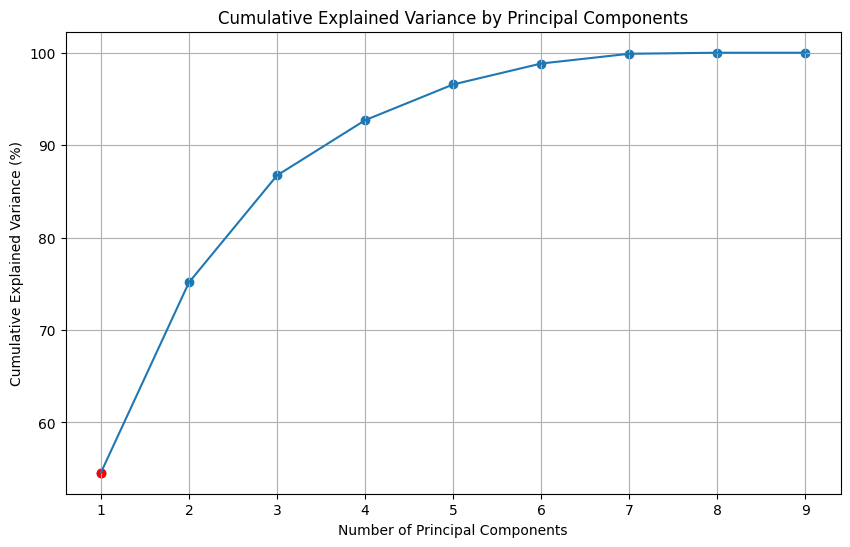

In [39]:
from sklearn.decomposition import PCA

# List of relevant DataFrames
dfs = [
    batsmen_averages_df['Standardized Average'],
    strike_rates_df['Standardised'],
    avg_balls_faced_df['Standardised'],
    centuries_df['Standardised'],
    half_centuries_df['Standardised'],
    fours_per_innings_df['Standardised'],
    sixes_per_innings_df['Standardised'],
    dot_ball_percentage_df['Standardised'],
    bowling_averages_df['Average'],
    balls_per_wicket_df['Standardised'],
    wickets_taken_per_game_df['Standardised'],
    runs_given_per_over_df['Standardised'],
    sixes_percentage_df['Standardised'],
    fours_percentage_df['Standardised'],
    avg_overs_per_match_df['Standardised'],
    boundary_freq_batsman_df['Standardised'],
    boundary_freq_batsman_df['Standardised']
]

merged_df = pd.concat(dfs, axis=1, join='inner')

pca = PCA()
principal_components = pca.fit_transform(merged_df) 

principal_df = pd.DataFrame(
    data=principal_components,
    index=merged_df.index,
    columns=[f'PC{i+1}' for i in range(principal_components.shape[1])]
)

print("Principal Components:")
print(principal_df)

cumulative_variance = pca.explained_variance_ratio_.cumsum() * 100 
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)  
plt.scatter(1, cumulative_variance[0], color='red')  
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [40]:
#This is a dictionary containing the role of each player
cricket_players = {
    'YBK Jaiswal': 'BAT',
    'JC Buttler': 'WK',
    'SV Samson': 'WK',
    'D Padikkal': 'BAT',
    'SO Hetmyer': 'BAT',
    'R Ashwin': 'AR',
    'R Parag': 'AR',
    'TA Boult': 'BWL',
    'OC McCoy': 'BWL',
    'WP Saha': 'WK',
    'Shubman Gill': 'BAT',
    'MS Wade': 'WK',
    'HH Pandya': 'AR',
    'DA Miller': 'BAT',
    'V Kohli': 'BAT',
    'F du Plessis': 'BAT',
    'RM Patidar': 'BAT',
    'GJ Maxwell': 'AR',
    'MK Lomror': 'AR',
    'KD Karthik': 'WK',
    'Shahbaz Ahmed': 'AR',
    'PWH de Silva': 'AR',
    'HV Patel': 'BWL',
    'JR Hazlewood': 'BWL',
    'Q de Kock': 'WK',
    'KL Rahul': 'WK',
    'M Vohra': 'BAT',
    'DJ Hooda': 'AR',
    'MP Stoinis': 'AR',
    'E Lewis': 'BAT',
    'KH Pandya': 'AR',
    'PVD Chameera': 'BWL',
    'PK Garg': 'BAT',
    'Abhishek Sharma': 'AR',
    'RA Tripathi': 'BAT',
    'AK Markram': 'AR',
    'N Pooran': 'WK',
    'Washington Sundar': 'AR',
    'R Shepherd': 'AR',
    'J Suchith': 'BWL',
    'B Kumar': 'BWL',
    'Umran Malik': 'BWL',
    'JM Bairstow': 'WK',
    'S Dhawan': 'BAT',
    'M Shahrukh Khan': 'BAT',
    'MA Agarwal': 'BAT',
    'LS Livingstone': 'AR',
    'JM Sharma': 'BWL',
    'PN Mankad': 'AR',
    'PP Shaw': 'BAT',
    'DA Warner': 'BAT',
    'MR Marsh': 'AR',
    'RR Pant': 'WK',
    'SN Khan': 'BAT',
    'R Powell': 'BAT',
    'AR Patel': 'AR',
    'SN Thakur': 'BWL',
    'Kuldeep Yadav': 'BWL',
    'Ishan Kishan': 'WK',
    'RG Sharma': 'BAT',
    'D Brevis': 'BAT',
    'Tilak Varma': 'BAT',
    'TH David': 'BAT',
    'Ramandeep Singh': 'AR',
    'DR Sams': 'AR',
    'RD Gaikwad': 'BAT',
    'DP Conway': 'BAT',
    'MM Ali': 'AR',
    'N Jagadeesan': 'WK',
    'AT Rayudu': 'BAT',
    'MS Dhoni': 'WK',
    'Simarjeet Singh': 'BWL',
    'MJ Santner': 'AR',
    'R Tewatia': 'AR',
    'Rashid Khan': 'AR',
    'VR Iyer': 'BAT',
    'N Rana': 'BAT',
    'A Tomar': 'BAT',
    'SS Iyer': 'BAT',
    'SW Billings': 'WK',
    'AD Russell': 'AR',
    'RK Singh': 'BAT',
    'SP Narine': 'AR',
    'UT Yadav': 'BWL',
    'KS Williamson': 'BAT',
    'T Stubbs': 'BAT',
    'R Sanjay Yadav': 'AR',
    'JJ Bumrah': 'BWL',
    'Lalit Yadav': 'AR',
    'PBB Rajapaksa': 'BAT',
    'Harpreet Brar': 'BWL',
    'R Dhawan': 'BWL',
    'RD Chahar': 'BWL',
    'K Rabada': 'BWL',
    'Arshdeep Singh': 'BWL',
    'JDS Neesham': 'AR',
    'A Badoni': 'BAT',
    'JO Holder': 'AR',
    'Mohsin Khan': 'BWL',
    'Avesh Khan': 'BWL',
    'S Dube': 'AR',
    'AM Rahane': 'BAT',
    'Shashank Singh': 'BAT',
    'M Jansen': 'BWL',
    'Mohammed Siraj': 'BWL',
    'RV Uthappa': 'WK',
    'DJ Bravo': 'AR',
    'M Theekshana': 'BWL',
    'Mukesh Choudhary': 'BWL',
    'HR Shokeen': 'AR',
    'HE van der Dussen': 'BAT',
    'KS Bharat': 'WK',
    'KS Sharma': 'AR',
    'SP Jackson': 'WK',
    'PJ Cummins': 'BWL',
    'TG Southee': 'BWL',
    'KA Pollard': 'AR',
    'M Ashwin': 'BWL',
    'K Kartikeya': 'BWL',
    'RP Meredith': 'BWL',
    'RV Patel': 'BWL',
    'A Nortje': 'BWL',
    'KK Ahmed': 'BWL',
    'Kartik Tyagi': 'BWL',
    'Fazalhaq Farooqi': 'BWL',
    'B Indrajith': 'BAT',
    'AJ Finch': 'BAT',
    'AS Roy': 'BAT',
    'Shivam Mavi': 'AR',
    'Harshit Rana': 'BWL',
    'SA Yadav': 'BAT',
    'B Sai Sudharsan': 'BAT',
    'Mandeep Singh': 'BAT',
    'SA Abbott': 'BWL',
    'S Gopal': 'AR',
    'RA Jadeja': 'AR',
    'D Pretorius': 'AR',
    'PJ Sangwan': 'BWL',
    'LH Ferguson': 'BWL',
    'AS Joseph': 'BWL',
    'KK Nair': 'BAT',
    'DJ Mitchell': 'AR',
    'A Manohar': 'BAT',
    'M Prasidh Krishna': 'BWL',
    'SS Prabhudessai': 'BAT',
    'MK Pandey': 'BAT',
    'JD Unadkat': 'BWL',
    'Anuj Rawat': 'WK',
    'Yash Dayal': 'BWL',
    'NT Ellis': 'BWL',
    'VG Arora': 'BWL',
    'Ravi Bishnoi': 'BWL',
    'CV Varun': 'BWL',
    'V Shankar': 'AR',
    'P Simran Singh': 'WK',
    'OF Smith': 'BWL',
    'FA Allen': 'AR',
    'TS Mills': 'BWL',
    'Aman Hakim Khan': 'BAT',
    'YS Chahal': 'BWL',
    'KR Sen': 'BWL',
    'Akash Deep': 'BWL',
    'K Gowtham': 'AR',
    'Rasikh Salam': 'BWL',
    'CJ Jordan': 'BWL',
    'DJ Willey': 'AR',
    'SE Rutherford': 'AR',
    'Abdul Samad': 'BAT',
    'TL Seifert': 'WK',
    'Mustafizur Rahman': 'BWL',
    'Navdeep Saini': 'BWL',
    'Anmolpreet Singh': 'BAT',
    'RA Bawa': 'AR',
    'NM Coulter-Nile': 'BWL',
    'EJG Morgan': 'BAT',
    'Shakib Al Hasan': 'AR',
    'AB de Villiers': 'BAT',
    'DT Christian': 'AR',
    'TK Curran': 'BWL',
    'SK Raina': 'BAT',
    'SS Tiwary': 'BAT',
    'J Yadav': 'BWL',
    'SPD Smith': 'BAT',
    'CH Morris': 'AR',
    'C Sakariya': 'BWL',
    'JJ Roy': 'BAT',
    'S Kaul': 'BWL',
    'KA Jamieson': 'BWL',
    'AF Milne': 'BWL',
    'CH Gayle': 'BAT',
    'KM Jadhav': 'BAT',
    'GD Phillips': 'BAT',
    'Sandeep Sharma': 'BWL',
    'SM Curran': 'AR',
    'DL Chahar': 'BWL',
    'T Shamsi': 'BWL',
    'GHS Garton': 'BWL',
    'MC Henriques': 'AR',
    'K Yadav': 'BWL',
    'PP Chawla': 'BWL',
    'Mohammad Nabi': 'AR',
    'Sachin Baby': 'BAT',
    'DJ Malan': 'BAT',
    'Mohammed Shami': 'BWL',
    'Virat Singh': 'BAT',
    'KL Nagarkoti': 'BWL',
    'Harbhajan Singh': 'BWL',
    'Mujeeb Ur Rahman': 'BWL',
    'JA Richardson': 'BWL',
    'CR Woakes': 'AR',
    'S Nadeem': 'BWL',
    'BA Stokes': 'AR',
    'CA Lynn': 'BAT',
    'SP Goswami': 'WK',
    'Gurkeerat Singh': 'AR',
    'AT Carey': 'WK',
    'JC Archer': 'BWL',
    'SS Cottrell': 'BWL',
    'T Banton': 'WK',
    'M Vijay': 'BAT',
    'SR Watson': 'AR',
    'P Dubey': 'AR',
    'JR Philippe': 'WK',
    'T Natarajan': 'BWL',
    'I Udana': 'AR',
    'VR Aaron': 'BWL',
    'TU Deshpande': 'BWL',
    'Imran Tahir': 'BWL',
    'AS Rajpoot': 'BWL',
    'DW Steyn': 'BWL',
    'NS Naik': 'WK',
    'AJ Tye': 'BWL',
    'JL Pattinson': 'BWL',
    'DS Kulkarni': 'BWL',
    'MJ McClenaghan': 'BWL',
    'C Munro': 'BAT',
    'KMA Paul': 'AR',
    'A Mishra': 'BWL',
    'I Sharma': 'BWL',
    'MJ Guptill': 'BAT',
    'Basil Thampi': 'BWL',
    'YK Pathan': 'AR',
    'PA Patel': 'WK',
    'C de Grandhomme': 'AR',
    'STR Binny': 'AR',
    'IS Sodhi': 'BWL',
    'CA Ingram': 'BAT',
    'H Klaasen': 'WK',
    'P Negi': 'AR',
    'BB Sran': 'BWL',
    'AJ Turner': 'BAT',
    'DR Shorey': 'BAT',
    'CR Brathwaite': 'AR',
    'AD Nath': 'BAT',
    'GC Viljoen': 'BWL',
    'Y Prithvi Raj': 'BWL',
    'KC Cariappa': 'BWL',
    'BCJ Cutting': 'AR',
    'RK Bhui': 'BAT',
    'JL Denly': 'BAT',
    'SD Lad': 'BAT',
    'HF Gurney': 'BWL',
    'Yuvraj Singh': 'BAT',
    'MM Sharma': 'BWL',
    'GH Vihari': 'BAT',
    'S Lamichhane': 'BWL',
    'P Ray Barman': 'BWL',
    'M Markande': 'BWL',
    'JPR Scantlebury-Searles': 'AR',
    'MK Tiwary': 'BAT',
    'AD Hales': 'BAT',
    'Anureet Singh': 'BWL',
    'DJM Short': 'BAT',
    'P Chopra': 'BAT',
    'JP Duminy': 'AR',
    'NV Ojha': 'WK',
    'BB McCullum': 'BAT',
    'LE Plunkett': 'BWL',
    'MG Johnson': 'BWL',
    'CJ Anderson': 'AR',
    'G Gambhir': 'BAT',
    'B Laughlin': 'BWL',
    'A Dananjaya': 'BWL',
    'B Stanlake': 'BWL',
    'R Vinay Kumar': 'BWL',
    'MA Wood': 'BWL',
    'LMP Simmons': 'BAT',
    'KV Sharma': 'AR',
    'IR Jaggi': 'BAT',
    'Bipul Sharma': 'AR',
    'SL Malinga': 'BWL',
    'Vishnu Vinod': 'WK',
    'TM Head': 'BAT',
    'MN Samuels': 'AR',
    'Z Khan': 'BWL',
    'SE Marsh': 'BAT',
    'Swapnil Singh': 'AR',
    'DR Smith': 'AR',
    'JP Faulkner': 'AR',
    'Ankit Soni': 'BWL',
    'P Kumar': 'BWL',
    'MM Patel': 'BWL',
    'HM Amla': 'BAT',
    'S Aravind': 'BWL',
    'S Badree': 'BWL',
    'A Choudhary': 'BWL',
    'IK Pathan': 'AR',
    'AR Bawne': 'BAT',
    'DM Bravo': 'AR',
    'AP Tare': 'WK',
    'AD Mathews': 'AR',
    'Ankit Sharma': 'BWL',
    'R Bhatia': 'AR',
    'A Zampa': 'BWL',
    'AB Dinda': 'BWL',
    'Iqbal Abdulla': 'BWL',
    'ER Dwivedi': 'WK',
    'R Sathish': 'AR',
    'SB Jakati': 'BWL',
    'F Behardien': 'BAT',
    'KJ Abbott': 'BWL',
    'UT Khawaja': 'BAT',
    'GJ Bailey': 'BAT',
    'NLTC Perera': 'AR',
    'M Morkel': 'BWL',
    'PV Tambe': 'BWL',
    'S Kaushik': 'BWL',
    'UBT Chand': 'BAT',
    'A Nehra': 'BWL',
    'PSP Handscomb': 'WK',
    'A Ashish Reddy': 'AR',
    'Parvez Rasool': 'AR',
    'JA Morkel': 'AR',
    'KP Pietersen': 'BAT',
    'KW Richardson': 'BWL',
    'P Sahu': 'BWL',
    'D Wiese': 'AR',
    'MEK Hussey': 'BAT',
    'MA Starc': 'BWL',
    'Azhar Mahmood': 'AR',
    'BE Hendricks': 'BWL',
    'RS Bopara': 'AR',
    'J Botha': 'AR',
    'GB Hogg': 'BWL',
    'Karanveer Singh': 'BWL',
    'RN ten Doeschate': 'AR',
    'NJ Maddinson': 'BAT',
    'V Sehwag': 'BAT',
    'J Theron': 'BWL',
    'DJ Muthuswami': 'BWL',
    'MS Bisla': 'WK',
    'RR Rossouw': 'BAT',
    'AN Ahmed': 'BWL',
    'RG More': 'BWL',
    'DJG Sammy': 'AR',
    'CM Gautam': 'WK',
    'DJ Hussey': 'AR',
    'PP Ojha': 'BWL',
    'BJ Hodge': 'BAT',
    'Y Venugopal Rao': 'BAT',
    'S Anirudha': 'BAT',
    'YV Takawale': 'WK',
    'VH Zol': 'BAT',
    'S Rana': 'BWL',
    'KK Cooper': 'AR',
    'VS Malik': 'BWL',
    'M de Lange': 'BWL',
    'Shivam Sharma': 'BWL',
    'WD Parnell': 'BWL',
    'LRPL Taylor': 'BAT',
    'R Shukla': 'AR',
    'DH Yagnik': 'WK',
    'M Manhas': 'BAT',
    'LR Shukla': 'AR',
    'L Balaji': 'BWL',
    'JH Kallis': 'AR',
    'BR Dunk': 'WK',
    'CA Pujara': 'BAT',
    'R Rampaul': 'BWL',
    'AM Nayar': 'AR',
    'S Badrinath': 'BAT',
    'R Dravid': 'BAT',
    'CL White': 'BAT',
    'BB Samantray': 'AR',
    'P Dogra': 'BAT',
    'LJ Wright': 'BAT',
    'RV Gomez': 'BAT',
    'DPMD Jayawardene': 'BAT',
    'B Chipli': 'BAT',
    'BJ Rohrer': 'BAT',
    'AC Gilchrist': 'WK',
    'SK Trivedi': 'BWL',
    'RE van der Merwe': 'AR',
    'DB Das': 'BAT',
    'SMSM Senanayake': 'BWL',
    'SR Tendulkar': 'BAT',
    'MC Juneja': 'BAT',
    'AB Agarkar': 'BWL',
    'LA Pomersbach': 'BAT',
    'A Mithun': 'BWL',
    'M Kartik': 'BWL',
    'Harmeet Singh': 'BWL',
    'P Awana': 'BWL',
    'UA Birla': 'BAT',
    'M Rawat': 'WK',
    'K Upadhyay': 'BWL',
    'MS Gony': 'BWL',
    'KC Sangakkara': 'WK',
    'R McLaren': 'AR',
    'PA Reddy': 'BAT',
    'BMAJ Mendis': 'BWL',
    'OA Shah': 'BAT',
    'TL Suman': 'BAT',
    'BAW Mendis': 'BWL',
    'R Sharma': 'BWL',
    'S Narwal': 'BWL',
    'B Lee': 'BWL',
    'A Mukund': 'BAT',
    'TM Dilshan': 'AR',
    'KB Arun Karthik': 'WK',
    'J Syed Mohammad': 'AR',
    'X Thalaivan Sargunam': 'BAT',
    'AG Murtaza': 'BWL',
    'IC Pandey': 'BWL',
    'A Chandila': 'BWL',
    'S Sreesanth': 'BWL',
    'SW Tait': 'BWL',
    'PC Valthaty': 'BAT',
    'AD Mascarenhas': 'AR',
    'RT Ponting': 'BAT',
    'AB McDonald': 'AR',
    'RJ Harris': 'BWL',
    'DB Ravi Teja': 'BAT',
    'MDKJ Perera': 'WK',
    'AL Menaria': 'BAT',
    'Sunny Gupta': 'BWL',
    'JEC Franklin': 'AR',
    'RP Singh': 'BWL',
    'M Muralitharan': 'BWL',
    'P Parameswaran': 'BWL',
    'JD Ryder': 'AR',
    'MJ Clarke': 'BAT',
    'SC Ganguly': 'BAT',
    'AP Majumdar': 'BAT',
    'CJ Ferguson': 'BAT',
    'Harpreet Singh': 'BWL',
    'SD Chitnis': 'BAT',
    'N Saini': 'BWL',
    'HH Gibbs': 'BAT',
    'Y Nagar': 'AR',
    'MD Mishra': 'BWL',
    'AC Thomas': 'AR',
    'DJ Harris': 'BAT',
    'AA Jhunjhunwala': 'BAT',
    'AUK Pathan': 'AR',
    'RJ Peterson': 'AR',
    'AA Chavan': 'BWL',
    'V Pratap Singh': 'BWL',
    'RE Levi': 'BAT',
    'DL Vettori': 'BWL',
    'KMDN Kulasekara': 'BWL',
    'AC Blizzard': 'BAT',
    'DJ Jacobs': 'WK',
    'CJ McKay': 'BWL',
    'M Kaif': 'BAT',
    'BA Bhatt': 'BWL',
    'RR Bhatkal': 'AR',
    'A Singh': 'BWL',
    'DAJ Bracewell': 'BWL',
    'DE Bollinger': 'BWL',
    'Y Gnaneswara Rao': 'BAT',
    'JJ van der Wath': 'AR',
    'CK Langeveldt': 'BWL',
    'S Sohal': 'BAT',
    'FY Fazal': 'BAT',
    'PR Shah': 'BAT',
    'JDP Oram': 'AR',
    'SK Warne': 'BWL',
    'ND Doshi': 'BWL',
    'S Sriram': 'AR',
    'JR Hopes': 'AR',
    'TR Birt': 'BAT',
    'MJ Lumb': 'BAT',
    'A Symonds': 'AR',
    'MV Boucher': 'WK',
    'AS Raut': 'BAT',
    'SJ Srivastava': 'BWL',
    'M Klinger': 'BAT',
    'RR Powar': 'BWL',
    'Sunny Singh': 'AR',
    'L Ablish': 'BWL',
    'I Malhotra': 'BAT',
    'GC Smith': 'BAT',
    'SB Wagh': 'BWL',
    'NL McCullum': 'AR',
    'B Akhil': 'AR',
    'TD Paine': 'WK',
    'JE Taylor': 'BWL',
    'VVS Laxman': 'BAT',
    'BJ Haddin': 'WK',
    'Joginder Sharma': 'BWL',
    'S Randiv': 'BWL',
    'SA Asnodkar': 'BAT',
    'AG Paunikar': 'WK',
    'R Ninan': 'BWL',
    'NJ Rimmington': 'BWL',
    'SB Styris': 'AR',
    'ML Hayden': 'BAT',
    'CRD Fernando': 'BWL',
    'Anirudh Singh': 'BAT',
    'B Sumanth': 'WK',
    'A Kumble': 'BWL',
    'WPUJC Vaas': 'BWL',
    'PD Collingwood': 'AR',
    'AC Voges': 'BAT',
    'Pankaj Singh': 'BWL',
    'C Madan': 'BAT',
    'KP Appanna': 'BWL',
    'ST Jayasuriya': 'AR',
    'AP Dole': 'BWL',
    'MF Maharoof': 'AR',
    'AB Barath': 'BAT',
    'T Thushara': 'BWL',
    'RS Sodhi': 'AR',
    'AA Bilakhia': 'BAT',
    'Jaskaran Singh': 'BWL',
    'K Goel': 'BAT',
    'KAJ Roach': 'BWL',
    'S Ladda': 'BWL',
    'DP Nannes': 'BWL',
    'JM Kemp': 'AR',
    'DR Martyn': 'BAT',
    'RS Gavaskar': 'BAT',
    'SE Bond': 'BWL',
    'A Uniyal': 'BWL',
    'S Tyagi': 'BWL',
    'YA Abdulla': 'BWL',
    'Mohammad Ashraful': 'BAT',
    'SM Katich': 'BAT',
    'WA Mota': 'AR',
    'RJ Quiney': 'BAT',
    'NK Patel': 'BAT',
    'T Henderson': 'BWL',
    'Yashpal Singh': 'BAT',
    'SS Shaikh': 'BAT',
    'Mashrafe Mortaza': 'BWL',
    'C Nanda': 'BWL',
    'Shoaib Ahmed': 'BWL',
    'AN Ghosh': 'BAT',
    'LA Carseldine': 'BAT',
    'MN van Wyk': 'WK',
    'SM Harwood': 'BWL',
    'L Ronchi': 'WK',
    'RR Raje': 'BWL',
    'W Jaffer': 'BAT',
    'D du Preez': 'BWL',
    'R Bishnoi': 'BWL',
    'TM Srivastava': 'BAT',
    'GR Napier': 'AR',
    'FH Edwards': 'BWL',
    'SB Bangar': 'AR',
    'A Flintoff': 'AR',
    'T Kohli': 'BAT',
    'A Chopra': 'BAT',
    'Kamran Khan': 'BWL',
    'S Vidyut': 'AR',
    'CK Kapugedera': 'BAT',
    'Kamran Akmal': 'WK',
    'Sohail Tanvir': 'AR',
    'Mohammad Asif': 'BWL',
    'VY Mahesh': 'BWL',
    'GD McGrath': 'BWL',
    'AS Yadav': 'BAT',
    'Shahid Afridi': 'AR',
    'SP Fleming': 'BAT',
    'SM Pollock': 'BWL',
    'Salman Butt': 'BAT',
    'Umar Gul': 'BWL',
    'Misbah-ul-Haq': 'BAT',
    'LPC Silva': 'BAT',
    'M Ntini': 'BWL',
    'VS Yeligati': 'BWL',
    'Mohammad Hafeez': 'AR',
    'DJ Thornely': 'AR',
    'H Das': 'BAT',
    'DNT Zoysa': 'BWL',
    'J Arunkumar': 'BAT',
    'DT Patil': 'BAT',
    'Abdur Razzak': 'BWL',
    'Shoaib Malik': 'AR',
    'Shoaib Akhtar': 'BWL',
    'PM Sarvesh Kumar': 'BWL',
    'DP Vijaykumar': 'BWL',
    'Younis Khan': 'BAT',
    'D Salunkhe': 'BWL',
    'T Taibu': 'WK',
    'RR Sarwan': 'BAT',
    'VRV Singh': 'BWL',
    'U Kaul': 'WK',
    'S Chanderpaul': 'BAT',
    'D Kalyankrishna': 'BWL',
    'MA Khote': 'AR',
    'SB Joshi': 'BWL',
    'DS Lehmann': 'BAT',
    'AA Noffke': 'AR',
    'R Sai Kishore': 'BWL',
    'M Pathirana': 'AR',
    'PH Solanki': 'BAT',
    'DG Nalkande': 'BWL',
    'IC Porel': 'BWL',
    'AU Rashid': 'BWL',
    'S Sandeep Warrier': 'BWL',
    'Akash Singh': 'BWL',
    'KM Asif': 'BWL',
    'L Ngidi': 'BWL',
    'LI Meriwala': 'BWL',
    'Jalaj S Saxena': 'AR',
    'Monu Kumar': 'BWL',
    'CJ Green': 'AR',
    'K Khejroliya': 'BWL',
    'O Thomas': 'BWL',
    'JP Behrendorff': 'BWL',
    'SC Kuggeleijn': 'BWL',
    'S Midhun': 'BWL',
    'CJ Dala': 'BWL',
    'MJ Henry': 'BWL',
    'NB Singh': 'BWL',
    'SS Agarwal': 'BAT',
    'Tejas Baroka': 'BWL',
    'SM Boland': 'BWL',
    'JW Hastings': 'AR',
    'GS Sandhu': 'BWL',
    'P Suyal': 'BWL',
    'K Santokie': 'BWL',
    'BW Hilfenhaus': 'BWL',
    'Anand Rajan': 'BWL',
    'MG Neser': 'AR',
    'TP Sudhindra': 'BWL',
    'RW Price': 'BWL',
    'SS Mundhe': 'AR',
    'P Prasanth': 'BWL',
    'AM Salvi': 'BWL',
    'AA Kazi': 'BWL',
    'MB Parmar': 'BWL',
    'C Ganapathy': 'AR',
    'RA Shaikh': 'BWL',
    'SS Sarkar': 'BWL',
    'RR Bose': 'BWL',
    'B Geeves': 'BWL',
    'A Nel': 'BWL',
    'Gagandeep Singh': 'BWL',
    'P Amarnath': 'BWL',
    'Milind Kumar': 'BAT',
    'B Aparajith': 'AR',
    'AV Wankhade': 'BAT',
    'T Mishra': 'BWL',
    'KH Devdhar': 'WK'
}


In [43]:
import pandas as pd
import pulp as pl
import ast

def load_data(matches_path, ball_by_ball_path):
    try:
        matches_df = pd.read_csv(matches_path)
        ball_by_ball_df = pd.read_csv(ball_by_ball_path)
        return matches_df, ball_by_ball_df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None

def preprocess_data(matches_df, ball_by_ball_df):
    team_corrections = {'Delhi Daredevils': 'Delhi', 'Delhi Capitals': 'Delhi', 'Rising Pune Supergiant': 'Rising Pune Supergiants'}
    for column in ['Team1', 'Team2', 'TossWinner', 'WinningTeam']:
        matches_df[column] = matches_df[column].replace(team_corrections)
    ball_by_ball_df['BattingTeam'] = ball_by_ball_df['BattingTeam'].replace(team_corrections)
    indices_to_remove = matches_df[(matches_df['method'].notna()) | (matches_df['WonBy'] == 'NoResults')]['ID']
    matches_df = matches_df[~matches_df['ID'].isin(indices_to_remove)]
    ball_by_ball_df = ball_by_ball_df[~ball_by_ball_df['ID'].isin(indices_to_remove)]
    return matches_df, ball_by_ball_df

def calculate_batting_performance(ball_by_ball_df, match_id):
    match_balls = ball_by_ball_df[ball_by_ball_df['ID'] == match_id]
    batting_performance = match_balls.groupby(['batter']).agg(
        runs_scored=pd.NamedAgg(column='batsman_run', aggfunc='sum'),
        balls_faced=pd.NamedAgg(column='ballnumber', aggfunc='count'),
        fours=pd.NamedAgg(column='batsman_run', aggfunc=lambda x: (x==4).sum()),
        sixes=pd.NamedAgg(column='batsman_run', aggfunc=lambda x: (x==6).sum())
    ).reset_index()

    ducks_df = match_balls[(match_balls['batsman_run'] == 0) & (match_balls['isWicketDelivery'] == 1)].groupby('batter').size().reset_index(name='ducks')
    batting_performance = batting_performance.merge(ducks_df, on='batter', how='left')
    batting_performance['ducks'].fillna(0, inplace=True)

    batting_performance['duck_penalty'] = batting_performance['ducks'].apply(lambda x: -2 if x > 0 else 0)

    batting_performance['half_century_bonus'] = batting_performance['runs_scored'].apply(lambda x: 8 if x >= 50 and x < 100 else 0)
    batting_performance['century_bonus'] = batting_performance['runs_scored'].apply(lambda x: 16 if x >= 100 else 0)

    batting_performance['batting_points'] = (
        batting_performance['runs_scored'] +
        batting_performance['fours'] +
        2 * batting_performance['sixes'] +
        batting_performance['duck_penalty'] +
        batting_performance['half_century_bonus'] +
        batting_performance['century_bonus']
    )

    def strike_rate_penalty(runs_scored, balls_faced):
        if balls_faced >= 10:
            strike_rate = (runs_scored / balls_faced) * 100
            if strike_rate < 50:
                return -6
            elif 50 <= strike_rate < 60:
                return -4
            elif 60 <= strike_rate < 70:
                return -2
        return 0

    batting_performance['strike_rate_penalty'] = batting_performance.apply(lambda x: strike_rate_penalty(x['runs_scored'], x['balls_faced']), axis=1)
    batting_performance['total_batting_points'] = batting_performance['batting_points'] + batting_performance['strike_rate_penalty']
    return batting_performance

def calculate_bowling_performance(ball_by_ball_df, match_id):
    match_balls = ball_by_ball_df[ball_by_ball_df['ID'] == match_id]
    
    valid_wicket_types = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
    wickets_df = match_balls[match_balls['kind'].isin(valid_wicket_types)].groupby('bowler').size().reset_index(name='wickets')
    
    caught_and_bowled_df = match_balls[match_balls['kind'] == 'caught and bowled'].groupby('bowler').size().reset_index(name='caught_and_bowled')
    
    bowling_performance = pd.merge(wickets_df, caught_and_bowled_df, on='bowler', how='left').fillna(0)
    
    legal_balls = match_balls[~match_balls['extra_type'].isin(['noball', 'wide'])]
    balls_bowled_df = legal_balls.groupby('bowler').size().reset_index(name='balls_bowled')
    runs_conceded_df = match_balls.groupby('bowler')['total_run'].sum().reset_index(name='runs_conceded')
    bowling_performance = pd.merge(bowling_performance, balls_bowled_df, on='bowler', how='outer')
    bowling_performance = pd.merge(bowling_performance, runs_conceded_df, on='bowler', how='outer')
    
    bowling_performance['wicket_points'] = (bowling_performance['wickets'] - bowling_performance['caught_and_bowled']) * 25 + bowling_performance['caught_and_bowled'] * 33
    
    bowling_performance['bonus_points'] = bowling_performance['wickets'].apply(lambda x: 8 if x == 4 else (16 if x >= 5 else 0))
    
    bowling_performance['overs_bowled'] = bowling_performance['balls_bowled'] // 6
    
    bowling_performance['economy_rate'] = bowling_performance['runs_conceded'] / bowling_performance['overs_bowled']
    
    overs_df = legal_balls.groupby(['bowler', 'overs']).agg(total_runs=('total_run', 'sum')).reset_index()
    maiden_overs_df = overs_df[overs_df['total_runs'] == 0].groupby('bowler').size().reset_index(name='maiden_overs')
    bowling_performance = pd.merge(bowling_performance, maiden_overs_df, on='bowler', how='left')
    bowling_performance['maiden_overs'].fillna(0, inplace=True)
    
    bowling_performance['maiden_overs'].fillna(0, inplace=True)
    bowling_performance['maiden_over_points'] = bowling_performance['maiden_overs'] * 8

    def economy_rate_bonus(overs, economy):
        if overs >= 2:
            if 5 < economy <= 6:
                return 2
            elif 4 < economy <= 5:
                return 4
        return 0

    bowling_performance['economy_rate_bonus'] = bowling_performance.apply(
        lambda x: economy_rate_bonus(x['overs_bowled'], x['economy_rate']), axis=1)
    
    bowling_performance['total_bowling_points'] = (
        bowling_performance['wicket_points'] +
        bowling_performance['bonus_points'] +
        bowling_performance['economy_rate_bonus'] +
        bowling_performance['maiden_over_points']
    )
    
    return bowling_performance

def calculate_fielding_performance(ball_by_ball_df, match_id):
    match_balls = ball_by_ball_df[ball_by_ball_df['ID'] == match_id]
    
    catches_df = match_balls[match_balls['kind'] == 'caught'].groupby('fielders_involved').size().reset_index(name='catches')
    
    stumpings_df = match_balls[match_balls['kind'] == 'stumped'].groupby('fielders_involved').size().reset_index(name='stumpings')
    
    run_outs_expanded = match_balls[match_balls['kind'] == 'run out'].copy()
    run_outs_expanded['fielders_involved'] = run_outs_expanded['fielders_involved'].apply(lambda x: x.split(",") if pd.notnull(x) else x)
    run_outs_expanded = run_outs_expanded.explode('fielders_involved')
    
    run_outs_df = (run_outs_expanded.groupby('fielders_involved')
                   .size().reset_index(name='run_outs'))
    
    fielding_performance = pd.merge(catches_df, stumpings_df, on='fielders_involved', how='outer')
    fielding_performance = pd.merge(fielding_performance, run_outs_df, on='fielders_involved', how='outer').fillna(0)
    
    fielding_performance['fielding_points'] = (
        8 * fielding_performance['catches'] +
        12 * fielding_performance['stumpings'] +
        6 * fielding_performance['run_outs']
    )
    
    return fielding_performance

def assign_player_roles(ball_by_ball_df, match_id):
    match_players = set(ball_by_ball_df[ball_by_ball_df['ID'] == match_id]['batter'].tolist() +
                        ball_by_ball_df[ball_by_ball_df['ID'] == match_id]['bowler'].tolist())
    
    roles_df = pd.DataFrame(list(match_players), columns=['player'])
    
    roles_df['role'] = roles_df['player'].map(cricket_players)
    
    missing_players = roles_df[roles_df['role'].isna()]['player'].tolist()
    if missing_players:
        print(f"Warning: Roles not found for the following players in match {match_id}:")
        print(missing_players)
        roles_df.loc[roles_df['role'].isna(), 'role'] = 'Unknown'
    
    role_map = {'AR': 'all-rounder', 'WK': 'wicketkeeper', 'BAT': 'batter', 'BWL': 'bowler'}
    roles_df['role'] = roles_df['role'].map(role_map)
    
    return roles_df

def aggregate_player_points(matches_df, ball_by_ball_df, match_id):
    batting_performance = calculate_batting_performance(ball_by_ball_df, match_id)
    bowling_performance = calculate_bowling_performance(ball_by_ball_df, match_id)
    fielding_performance = calculate_fielding_performance(ball_by_ball_df, match_id)
    
    batting_performance.rename(columns={'batter': 'player'}, inplace=True)
    bowling_performance.rename(columns={'bowler': 'player'}, inplace=True)
    fielding_performance.rename(columns={'fielders_involved': 'player'}, inplace=True)
    
    total_points = pd.merge(batting_performance[['player', 'total_batting_points']], bowling_performance[['player', 'total_bowling_points']], on='player', how='outer')
    total_points = pd.merge(total_points, fielding_performance[['player', 'fielding_points']], on='player', how='outer').fillna(0)
    
    total_points['starting_xi_points'] = 4
    
    total_points['total_points'] = total_points['total_batting_points'] + total_points['total_bowling_points'] + total_points['fielding_points'] + total_points['starting_xi_points']
    
    total_points = total_points.sort_values(by='total_points', ascending=False).reset_index(drop=True)

    player_roles_df = assign_player_roles(ball_by_ball_df, match_id)
    total_points = pd.merge(total_points, player_roles_df, on='player', how='left')
    
    return total_points

def add_team_information(total_points_df, matches_df, match_id):
    match_data = matches_df.loc[matches_df['ID'] == match_id].iloc[0]
    team1, team2 = match_data['Team1'], match_data['Team2']
    team1_players = ast.literal_eval(match_data['Team1Players'])
    team2_players = ast.literal_eval(match_data['Team2Players'])
    
    player_to_team = {player: team1 for player in team1_players}
    player_to_team.update({player: team2 for player in team2_players})
    
    total_points_df['team'] = total_points_df['player'].map(player_to_team)
    
    return total_points_df

def select_dream11_team(total_points_df, matches_df, match_id):
    prob = pl.LpProblem("Dream11_Team_Selection", pl.LpMaximize)
    
    player_vars = pl.LpVariable.dicts("Players", total_points_df['player'], 0, 1, pl.LpBinary)
    captain_vars = pl.LpVariable.dicts("Captain", total_points_df['player'], 0, 1, pl.LpBinary)
    vice_captain_vars = pl.LpVariable.dicts("ViceCaptain", total_points_df['player'], 0, 1, pl.LpBinary)
    
    prob += pl.lpSum([total_points_df.loc[i, 'total_points'] * (player_vars[player] + 
                     2 * captain_vars[player] + 1.5 * vice_captain_vars[player]) 
                     for i, player in enumerate(total_points_df['player'])]), "TotalPoints"
    
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['role'] == 'WK']['player']]) >= 1, "MinWicketKeepers"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['role'] == 'BAT']['player']]) >= 3, "MinBatsmen"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['role'] == 'AR']['player']]) >= 1, "MinAllRounders"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['role'] == 'BWL']['player']]) >= 3, "MinBowlers"

    match_row = matches_df[matches_df['ID'] == match_id].iloc[0]
    team1, team2 = match_row['Team1'], match_row['Team2']
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['team'] == team1]['player']]) <= 7, "MaxFromTeam1"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['team'] == team2]['player']]) <= 7, "MaxFromTeam2"

    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['team'] == team1]['player']]) >= 4, "MinFromTeam1"
    prob += pl.lpSum([player_vars[i] for i in total_points_df[total_points_df['team'] == team2]['player']]) >= 4, "MinFromTeam2"
    
    prob += pl.lpSum([captain_vars[player] for player in total_points_df['player']]) == 1, "OneCaptain"
    prob += pl.lpSum([vice_captain_vars[player] for player in total_points_df['player']]) == 1, "OneViceCaptain"
    
    prob += pl.lpSum([player_vars[player] for player in total_points_df['player']]) == 11, "Total11Players"
    
    for player in total_points_df['player']:
        prob += captain_vars[player] + vice_captain_vars[player] <= 1, f"OneRolePerPlayer_{player}"
    
    prob.solve()
    
    team_details = []
    total_team_points = 0
    print("Dream 11 Team Selection:\n")
    for player in total_points_df['player']:
        if player_vars[player].value() == 1:
            role = "C" if captain_vars[player].value() == 1 else ("VC" if vice_captain_vars[player].value() == 1 else total_points_df.loc[total_points_df['player'] == player, 'role'].values[0])
            points = total_points_df.loc[total_points_df['player'] == player, 'total_points'].values[0]
            print(f"{player}, Role: {role}, Points: {points}")
            if role == "C":
                total_team_points += 2 * points
            elif role == "VC":
                total_team_points += 1.5 * points
            else:
                total_team_points += points
            team_details.append((player, role, points))

    print("\nTotal Team Points:", total_team_points)

    return team_details
    
    

def main():
    matches_path = '/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Matches_2008_2022.csv'
    ball_by_ball_path = '/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Ball_by_Ball_2008_2022.csv'
    matches_df, ball_by_ball_df = load_data(matches_path, ball_by_ball_path)
    if matches_df is not None and ball_by_ball_df is not None:
        matches_df, ball_by_ball_df = preprocess_data(matches_df, ball_by_ball_df)
        first_match_id = matches_df.iloc[1]['ID']
        total_player_points = aggregate_player_points(matches_df, ball_by_ball_df, first_match_id)
        
        total_player_points = add_team_information(total_player_points, matches_df, first_match_id)
        
        dream11_team = select_dream11_team(total_player_points, matches_df, first_match_id)
        
        print(dream11_team)


if __name__ == '__main__':
    main()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/fb66c0d593d84a8d86d512517626782a-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/fb66c0d593d84a8d86d512517626782a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 38 COLUMNS
At line 391 RHS
At line 425 BOUNDS
At line 492 ENDATA
Problem MODEL has 33 rows, 66 columns and 154 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.05

Dream 11 Team Selection:

JC Buttler, Role: C, Points: 156.0
OC McCoy, Role: bowler, Points: 89.0
M Prasidh Krishna, R

In [44]:
#this part of the code is to return the best team for each match

def main():
    matches_path = '/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Matches_2008_2022.csv'
    ball_by_ball_path = '/Users/samarth/Desktop/Plaksha/Dream 11 team prediction/IPL_Ball_by_Ball_2008_2022.csv'
    matches_df, ball_by_ball_df = load_data(matches_path, ball_by_ball_path)
    if matches_df is not None and ball_by_ball_df is not None:
        matches_df, ball_by_ball_df = preprocess_data(matches_df, ball_by_ball_df)
        
        best_11_teams = []
        
        for match_id in matches_df['ID']:
            total_player_points = aggregate_player_points(matches_df, ball_by_ball_df, match_id)
            total_player_points = add_team_information(total_player_points, matches_df, match_id)
            dream11_team = select_dream11_team(total_player_points, matches_df, match_id)
            
            best_11_team = [player[0] for player in dream11_team]
            best_11_teams.append((match_id, best_11_team))
        
        best_11_teams_df = pd.DataFrame(best_11_teams, columns=['ID', 'Best11Team'])
        print(best_11_teams_df)
        
        for i in best_11_teams_df['Best11Team']:
            print(i)
        
        print(best_11_teams_df['Best11Team'].head())
        
        return best_11_teams_df

best_11_teams_df = main()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/6d421c847d4643ffb1242758f31e8238-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/_h/jxvj802571jc913dqclhpw0c0000gn/T/6d421c847d4643ffb1242758f31e8238-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 38 COLUMNS
At line 391 RHS
At line 425 BOUNDS
At line 492 ENDATA
Problem MODEL has 33 rows, 66 columns and 154 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02

Dream 11 Team Selection:

HH Pandya, Role: C, Points: 128.0
R Sai Kishore, Role: bowler, Points: 70.0
Shubman Gill, Ro

In [45]:
best_11_teams_df

,ID,Best11Team
0,1312200,"[HH Pandya, R Sai Kishore, Shubman Gill, DA Mi..."
1,1312199,"[JC Buttler, OC McCoy, M Prasidh Krishna, RM P..."
2,1312198,"[RM Patidar, KL Rahul, JR Hazlewood, DJ Hooda,..."
3,1312197,"[JC Buttler, DA Miller, HH Pandya, SV Samson, ..."
4,1304116,"[NT Ellis, Harpreet Brar, LS Livingstone, Wash..."
...,...,...
922,335986,"[M Kartik, DJ Hussey, PP Ojha, Mohammad Hafeez..."
923,335985,"[Z Khan, Harbhajan Singh, MV Boucher, ST Jayas..."
924,335984,"[G Gambhir, S Dhawan, R Bhatia, MF Maharoof, S..."
925,335983,"[MEK Hussey, JR Hopes, KC Sangakkara, IK Patha..."


In [46]:

#This section of the code is to concatenate the features(standardised) into one dataframe.
#Missing values have been replaced with 0 so that in the y equation value of that feature becomes 0
column_names = [
    'Batsmen Averages',
    'Strike Rates',
    'Average Balls Faced',
    'Centuries',
    'Half-Centuries',
    'Fours per Innings',
    'Sixes per Innings',
    'Dot Ball Percentage (Batsman)',
    'Dot Ball Percentage (Bowlers)',
    'Bowling Averages',
    'Balls per Wicket',
    'Wickets per Game',
    'Economy Rates',
    'Sixes Conceded per Over',
    'Fours Conceded per Over',
    'Average Overs per Match',
    'Boundary Frequency (Batsmen)',
    'Boundary Frequency (Bowlers)'
]

dfs = [batsmen_averages_df['Standardized Average'], strike_rates_df['Standardised'], avg_balls_faced_df['Standardised'],
       centuries_df['Standardised'], half_centuries_df['Standardised'], fours_per_innings_df['Standardised'],
       sixes_per_innings_df['Standardised'],dot_ball_percentage_batsman_df['Standardised'], dot_ball_percentage_df['Standardised'], bowling_averages_df['Average'],
       balls_per_wicket_df['Standardised'], wickets_taken_per_game_df['Standardised'], runs_given_per_over_df['Standardised'],
       sixes_percentage_df['Standardised'], fours_percentage_df['Standardised'], avg_overs_per_match_df['Standardised'],
       boundary_freq_batsman_df['Standardised'], boundary_freq_bowler_df['Standardised']]


extracted_features_df = pd.concat(dfs, axis=1)
extracted_features_df.columns = column_names
extracted_features_df = extracted_features_df.fillna(0)

extracted_features_df



,Batsmen Averages,Strike Rates,Average Balls Faced,Centuries,Half-Centuries,Fours per Innings,Sixes per Innings,Dot Ball Percentage (Batsman),Dot Ball Percentage (Bowlers),Bowling Averages,Balls per Wicket,Wickets per Game,Economy Rates,Sixes Conceded per Over,Fours Conceded per Over,Average Overs per Match,Boundary Frequency (Batsmen),Boundary Frequency (Bowlers)
HM Amla,2.831411,0.990164,1.991034,0.116100,-0.529486,2.459896,1.332625,0.999945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.196618,0.000000
KL Rahul,2.733667,0.532407,2.501679,1.664103,2.217298,1.628981,2.206134,1.052649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263313,0.000000
DA Warner,2.030102,0.921227,1.822950,1.664103,4.557151,1.978206,1.316814,0.523257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.869563,0.000000
AK Markram,1.957711,0.455892,1.062109,0.000000,-0.529486,0.212010,1.195604,2.190108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.205335,0.000000
AB de Villiers,1.950725,1.760896,0.765774,0.890102,3.234625,0.645239,1.810953,1.957679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.095593,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CR Brathwaite,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.342713,0.227700,0.506463,-0.061110,-0.997591,0.266003,-0.854041,-0.626313,0.000000,-0.688618
A Mithun,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.402341,-3.566185,-2.778503,-1.465917,-1.992954,-1.391131,-0.830456,-0.049163,0.000000,-1.361015
KC Cariappa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.537741,-0.519745,-0.260696,-0.663170,-0.886962,-0.715459,0.407355,0.217948,0.000000,0.073951
BCJ Cutting,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.556087,-1.167530,-0.732420,-0.946493,-1.316265,-0.220638,-1.282059,-0.997679,0.000000,-1.366369


In [47]:
#This shows that player names are unique

l = []
for i in extracted_features_df.index:
    if i not in l:
        l.append(i)
        
print(len(l))

361


In [48]:
player_roles = set(cricket_players.keys())
missing_indices = player_roles - set(extracted_features_df.index)
new_rows_df = pd.DataFrame(0, index=list(missing_indices), columns=extracted_features_df.columns)

extracted_features_df = pd.concat([extracted_features_df, new_rows_df])

extracted_features_df

,Batsmen Averages,Strike Rates,Average Balls Faced,Centuries,Half-Centuries,Fours per Innings,Sixes per Innings,Dot Ball Percentage (Batsman),Dot Ball Percentage (Bowlers),Bowling Averages,Balls per Wicket,Wickets per Game,Economy Rates,Sixes Conceded per Over,Fours Conceded per Over,Average Overs per Match,Boundary Frequency (Batsmen),Boundary Frequency (Bowlers)
HM Amla,2.831411,0.990164,1.991034,0.116100,-0.529486,2.459896,1.332625,0.999945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.196618,0.0
KL Rahul,2.733667,0.532407,2.501679,1.664103,2.217298,1.628981,2.206134,1.052649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263313,0.0
DA Warner,2.030102,0.921227,1.822950,1.664103,4.557151,1.978206,1.316814,0.523257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.869563,0.0
AK Markram,1.957711,0.455892,1.062109,0.000000,-0.529486,0.212010,1.195604,2.190108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.205335,0.0
AB de Villiers,1.950725,1.760896,0.765774,0.890102,3.234625,0.645239,1.810953,1.957679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.095593,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PBB Rajapaksa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
T Shamsi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
AS Roy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
TL Seifert,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [49]:
#Essential for this code to work properly
#Make sure you run this only once after df2 has been loaded
df2['Team1Players'] = df2['Team1Players'].apply(lambda x: x[1:-1] if isinstance(x, str) else x)
df2['Team2Players'] = df2['Team2Players'].apply(lambda x: x[1:-1] if isinstance(x, str) else x)

In [50]:
import pulp as pl

def select_best_11_players(first_team, second_team, player_pred_dict, player_roles):
    # Combine the players from both teams
    all_players = first_team + second_team
    print(all_players)
    # Create the LP problem
    prob = pl.LpProblem("Best_11_Selection", pl.LpMaximize)

    # Decision variables
    player_vars = pl.LpVariable.dicts("Players", all_players, 0, 1, pl.LpBinary)

    # Objective function
    prob += pl.lpSum([player_pred_dict[player] * player_vars[player] for player in all_players]), "TotalZValue"

    # Constraints
    # Player composition rules
    prob += pl.lpSum([player_vars[player] for player in all_players if player_roles.get(player, '') == 'WK']) >= 1, "MinWicketKeepers"
    prob += pl.lpSum([player_vars[player] for player in all_players if player_roles.get(player, '') == 'BAT']) >= 3, "MinBatsmen"
    prob += pl.lpSum([player_vars[player] for player in all_players if player_roles.get(player, '') == 'AR']) >= 1, "MinAllRounders"
    prob += pl.lpSum([player_vars[player] for player in all_players if player_roles.get(player, '') == 'BWL']) >= 3, "MinBowlers"

    # Team composition constraint
    prob += pl.lpSum([player_vars[player] for player in first_team]) <= 7, "MaxFromTeam1"
    prob += pl.lpSum([player_vars[player] for player in second_team]) <= 7, "MaxFromTeam2"

    # Total 11 players
    prob += pl.lpSum([player_vars[player] for player in all_players]) == 11, "Total11Players"

    # Solve the problem
    prob.solve()

    # Collect the selected players
    selected_players = [player for player in all_players if player_vars[player].value() == 1]

    return selected_players


In [51]:
def forward_pass(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return y_pred

#This part of the code is to initialise weights

np.random.seed(42)

def weights_initial(extracted_features_df):
    
    num_weights = len(extracted_features_df.columns)
    weights = np.random.uniform(low=-0.5, high=0.5, size=num_weights)

    bias = np.random.uniform(low=-0.5, high=0.5)
    
    return weights,bias


def sigmoid(x):
    a = 1/(1+np.exp(-1*x))
    return a

def calculate_loss(y_pred, y):
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def backward_pass(X, y_pred, y):
    dw = np.dot(X.T, (y_pred - y)) / len(y)
    db = np.sum(y_pred - y) / len(y)
    return dw, db

def update_parameters(weights, bias, dw, db, learning_rate):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias


# Normalize the input features
def extract_features(first_team, second_team, features_df):
    X = []
    all_players = first_team + second_team
    
    # Add missing players to the features_df with zero values
    missing_players = set(all_players) - set(features_df.index)
    for player in missing_players:
        features_df.loc[player] = np.zeros(features_df.shape[1])
    
    # Extract features for all players
    for player in all_players:
        player_features = features_df.loc[player].values
        X.append(player_features)
    
    X = np.array(X)
    return X




# Function to create the target vector based on the actual best 11 players
def create_target_vector(best_11, all_players):
    y_true = []
    for player in all_players:
        if player in best_11:
            y_true.append(1)
        else:
            y_true.append(0)
    return np.array(y_true)

def squared_error_cost(pred_best_11, best_11_teams_row):
    actual_best_11 = best_11_teams_row['best_team'].split(',')


    error = 0
    for player in pred_best_11:
        if player not in actual_best_11:
            error += 1

    for player in actual_best_11:
        if player not in pred_best_11:
            error += 1

    squared_error = error ** 2
    return squared_error



In [52]:
# Initialize the weights and bias
weights,bias = weights_initial(extracted_features_df)
# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Training loop
for iteration in range(num_iterations):
    total_loss = 0
    num_rows = 0

    for _, row in best_11_teams_df.iterrows():
        match_id = row['ID']
        best_11 = row['Best11Team']  # Convert the string to a list of player names

        try:
            team1_players_str = df2.loc[df2['ID'] == match_id, 'Team1Players'].iloc[0].strip("'")
            team1_players_list = [player.strip("'") for player in team1_players_str.split(', ')]
            team2_players_str = df2.loc[df2['ID'] == match_id, 'Team2Players'].iloc[0].strip("'")
            team2_players_list = [player.strip("'") for player in team2_players_str.split(', ')]
        except (KeyError, IndexError):
            continue

        first_team = team1_players_list
        second_team = team2_players_list
        
   


        X = extract_features(first_team, second_team, extracted_features_df)
        y_pred = forward_pass(X, weights, bias)

        all_players = first_team + second_team
        y_true = create_target_vector(best_11,all_players)  # Concatenate first_team and second_team

        loss = calculate_loss(y_pred, y_true)
            
        total_loss += loss
        num_rows += 1

        dw, db = backward_pass(X, y_pred, y_true)
        weights, bias = update_parameters(weights, bias, dw, db, learning_rate)

    # Calculate average loss for the current iteration
    if num_rows > 0:
        avg_loss = total_loss / num_rows
        print(f"Iteration {iteration+1}, Loss: {avg_loss:.4f}")
    else:
        print(f"Iteration {iteration+1}, No rows found in best_11_teams DataFrame.")


        


Iteration 1, Loss: 0.7024
Iteration 2, Loss: 0.6899
Iteration 3, Loss: 0.6884
Iteration 4, Loss: 0.6879
Iteration 5, Loss: 0.6875
Iteration 6, Loss: 0.6873
Iteration 7, Loss: 0.6871
Iteration 8, Loss: 0.6870
Iteration 9, Loss: 0.6869
Iteration 10, Loss: 0.6868
Iteration 11, Loss: 0.6867
Iteration 12, Loss: 0.6866
Iteration 13, Loss: 0.6866
Iteration 14, Loss: 0.6865
Iteration 15, Loss: 0.6865
Iteration 16, Loss: 0.6865
Iteration 17, Loss: 0.6864
Iteration 18, Loss: 0.6864
Iteration 19, Loss: 0.6864
Iteration 20, Loss: 0.6863
Iteration 21, Loss: 0.6863
Iteration 22, Loss: 0.6863
Iteration 23, Loss: 0.6863
Iteration 24, Loss: 0.6862
Iteration 25, Loss: 0.6862
Iteration 26, Loss: 0.6862
Iteration 27, Loss: 0.6862
Iteration 28, Loss: 0.6862
Iteration 29, Loss: 0.6862
Iteration 30, Loss: 0.6861
Iteration 31, Loss: 0.6861
Iteration 32, Loss: 0.6861
Iteration 33, Loss: 0.6861
Iteration 34, Loss: 0.6861
Iteration 35, Loss: 0.6861
Iteration 36, Loss: 0.6861
Iteration 37, Loss: 0.6860
Iteration 

KeyboardInterrupt: 

The code below is to run PCA